In [252]:
# Modeling and Simulation in Python:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *


In [253]:
def add_five(x):
    return x + 5

In [254]:
y = add_five(3)

8

In [255]:
add_five(5)

10

In [256]:
add_five(3)
add_five(5)

10

In [257]:
y1 = add_five(3)
y2 = add_five(5)
print(y1, y2)

8 10


In [258]:
#Exercise: 

#Function make state object
def make_state():
    state = State(olin=10, wellesley=2)
    return state  

In [259]:
init = make_state() 

olin         10
wellesley     2
Name: state, dtype: int64

In [260]:
#Running simulations:

def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

In [261]:
def run_simulation(p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)
                    
    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

In [262]:
state = run_simulation(0.4, 0.2, 60)

olin                0
wellesley          12
olin_empty         12
wellesley_empty     0
Name: state, dtype: int64

In [263]:
state.olin_empty

12

In [264]:
state = run_simulation(0.2, 0.2, 60)
state.olin_empty

0

In [265]:
state = run_simulation(0.6, 0.2, 60)
state.olin_empty

13

In [266]:
# More for loops

p1_array = linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [267]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


In [268]:
help(linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s

In [269]:
#Exercise:

np.linspace(1, 10, num=10, endpoint=True)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [270]:
help(linrange)

Help on function linrange in module modsim:

linrange(start, stop=None, step=1)
    Make an array of equally spaced values.
    
    start: first value
    stop: last value (might be approximate)
    step: difference between elements (should be consistent)
    
    returns: NumPy array



In [271]:
import numpy as np
linrange(1, 11, 2)

array([ 1.,  3.,  5.,  7.,  9., 11.])

In [272]:
#Sweeping parameters

p2 = 0.2
num_steps = 60
p1_array = linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [273]:
for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    print(p1, state.olin_empty)

0.0 0
0.1 0
0.2 0
0.30000000000000004 0
0.4 10
0.5 6
0.6000000000000001 12
0.7000000000000001 21
0.8 31
0.9 27
1.0 36


In [274]:
sweep = SweepSeries()
for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    sweep[p1] = state.olin_empty

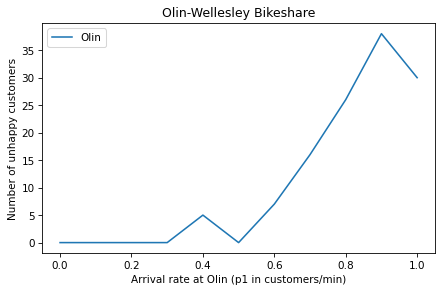

In [275]:
plot(sweep, label='Olin')
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

In [276]:
#Exercises

def sweep_p1(p1_array): #takes parameter p1_array
    p2 = 0.2 #p2 kept constant
    num_steps = 60 #iterations=60
    sweep = SweepSeries() #stores in array sweepseries
    
    for p1 in p1_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p1] = state.olin_empty
        
    return sweep

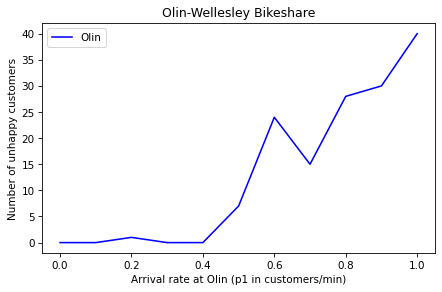

In [277]:
p1_array = linspace(0, 1, 11) 
np.random.seed(123) 
sweep = sweep_p1(p1_array)
plot(sweep, '-b', label='Olin') 
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

In [287]:
def sweep_p2(p2_array):
    p1 = 0.5
    num_steps = 60
    sweep = SweepSeries() 
    
    for p2 in p2_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p2] = state.olin_empty
    return sweep

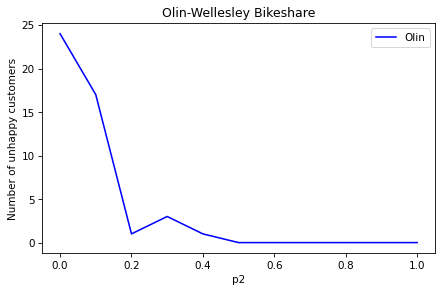

In [288]:
p2_array = linspace(0, 1, 11)
np.random.seed(1234)
sweep = sweep_p2(p2_array)
plot(sweep, '-b', label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='p2', 
         ylabel='Number of unhappy customers')

In [299]:
#Optional Exercises

#1.

def run_multiple_simulations(p1, p2, num_steps, num_runs):
    results = TimeSeries()
    for i in range(num_runs):
        state = run_simulation(p1, p2, num_steps) #runs the simulation for num_runs
        results[i] = state.olin_empty + state.wellesley_empty #total unhappy customers for both
    return results

In [300]:
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
np.random.seed(123)
run_multiple_simulations(p1, p2, num_steps, num_runs)

Time
0    1
1    4
2    0
3    9
4    0
5    5
6    2
7    2
8    4
9    0
Name: Quantity, dtype: int64

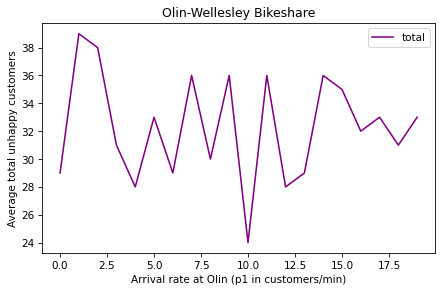

In [301]:
plot(results, label='total', color='purple')  
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Average total unhappy customers')

In [296]:
p1_array = linspace(0, 1, 11)
p2 = 0.3
num_steps = 60
num_runs = 20

sweep = SweepSeries()
for p1 in p1_array:
    results = run_multiple_simulations(p1, p2, num_steps, num_runs)
    sweep[p1] = results.mean()

Value of p1 that minimizes the average number of unhappy customers: 0.4


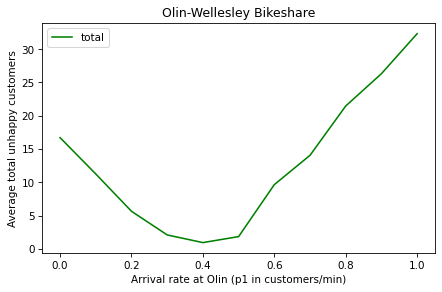

In [297]:
plot(sweep, label='total', color='green')
    
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Average total unhappy customers')

print('Value of p1 that minimizes the average number of unhappy customers:', 0.4)